# 031 Manipulating data: `numpy`


## Purpose


While Python has a rich set of modules and data types by default, for numerical computing you'll be using two main libraries that conform the backbone of the [Python scientific stack](https://scipy.org/about.html). These libraries implement a great deal of functionality related to mathematical operations and efficient computations on large data volumes. These libraries are [`numpy`](http://numpy.org) and [`scipy`](http://scipy.org). `numpy`, which we will concentrate on in this section, deals with efficient arrays, similar to lists, that simplify many common processing operations. Of course, just doing calculations isn't much fun if you can't plot some results. To do this, we use the [`matplotlib`](http://matplotlib.org) library that we have seen in previous sessions.

You may find it interesting to read the recent [numpy paper](https://www.nature.com/articles/s41586-020-2649-2) in Nature for some background and detail on `numpy`.


### Prerequisites

You will need some understanding of the following:


* [001 Using Notebooks](001_Notebook_use.ipynb)
* [003 Getting help](003_Help.ipynb)
* [010 Variables, comments and print()](010_Python_Introduction.ipynb)
* [011 Data types](011_Python_data_types.ipynb) 
* [012 String formatting](012_Python_strings.ipynb)
* [013_Python_string_methods](013_Python_string_methods.ipynb)
* [020_Python_files](020_Python_files.ipynb)
* [021_URLs](021_URLs.ipynb)
* [022_Pandas](022_Pandas.ipynb)
* [023 Plotting](023_Plotting.ipynb)
* [024_Image_display](024_Image_display.ipynb)
* [030_NASA_MODIS_Earthdata](030_NASA_MODIS_Earthdata.ipynb)


## `numpy`

### Introduction to arrays

You import the `numpy` library using

    import numpy as np
    
This means that all the functionality of `numpy` is accessed by the prefix `np.`: e.g. `np.array`. The main element of `numpy` is the numpy array. 

An array is in some ways like the [list object we have seen before](014_Python_groups.ipynb#list), but unlike a list, all the elements are of the same type, for example floating point numbers. Further, the range of things we can do with a `numpy` list is much greater than with the basic list.

In [1]:
import numpy as np  # Import the numpy library

# Example 1
# An array with 5 ones
arr = np.ones(5)
print(f'--> Array with 5 ones:\n{arr}')

# type
print(f'--> type of array:\n{type(arr)}')
assert type(arr) == np.ndarray

# Example 2
arr = np.array([1, 2, 3, 4])
print(f'--> Array started from a list of integers:\n{arr}')

# Example 3
# An array started from a list of numbers, what's the difference??
arr = np.array([1., 2, 3, 4])
print(f'--> Array started from a list of floats (some implicit):\n{arr}')


--> Array with 5 ones:
[1. 1. 1. 1. 1.]
--> type of array:
<class 'numpy.ndarray'>
--> Array started from a list of integers:
[1 2 3 4]
--> Array started from a list of floats (some implicit):
[1. 2. 3. 4.]


In the example above we have generated an array where all the elements are `1.0`, using [`np.ones`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html), and then we have been able to generate arrays from lists using the [`np.array`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html) function. The difference between the 2nd and 3rd examples is that in the 2nd example, all the elements of the list are integers, and in the 3rd example, one is a floating point number. `numpy` automatically makes the array floating point by converting the integers to floating point numbers.



We saw in an [earlier session](011_Python_data_types.ipynb#Conversion-between-data-types) how we could convert a floating point number to integer with:


In [2]:
float_version = 10.5
print(f'float version: {float_version}')

# convert individual number to int
int_version = int(float_version)
print(f'int version  : {int_version}')

float version: 10.5
int version  : 10


We can similarly convert between numpy data types (where appropriate) with `np.astype()`:

In [3]:
# An array started from a list of numbers, what's the difference??
float_version = np.array([1., 2., 3., 4.])
print(f'float version: {float_version}')

# convert whole array to int
int_version = float_version.astype(np.int)
print(f'int version  : {int_version}')

float version: [1. 2. 3. 4.]
int version  : [1 2 3 4]


### Array arithmetic

What else can we do with arrays? Perhaps the most significant thing is that can efficiently operate all array elements without loops, by treating the array as an object:

In [4]:
arr = np.ones(10)
print(f'2 x {arr} \n  = {2 * arr}')

2 x [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
  = [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


`numpy` is clever enough to figure out that the 2 multiplying the array is applied to all elements of the array, and returns an array of the same size as `arr` with the elements of `arr` multiplied by 2. We can also multiply two arrays of the same size. So let's create an array with the numbers 0 to 9 and one with the numbers 9 to 0 and do a times table:

In [5]:
arr1 = 9 * np.ones(10).astype(np.int)
arr2 = np.arange(1, 11)  # arange gives an array from 1 to 11, 11 not included

print(arr1)
print(arr2)

print(arr1 * arr2)

[9 9 9 9 9 9 9 9 9 9]
[ 1  2  3  4  5  6  7  8  9 10]
[ 9 18 27 36 45 54 63 72 81 90]


#### Exercise 1

* Using code similar to the above and a `for` loop, write the times tables for 2 to 10. The solution you're looking for should look a bit like this:

        [ 2  4  6  8 10 12 14 16 18 20]
        [ 3  6  9 12 15 18 21 24 27 30]
        [ 4  8 12 16 20 24 28 32 36 40]
        [ 5 10 15 20 25 30 35 40 45 50]
        [ 6 12 18 24 30 36 42 48 54 60]
        [ 7 14 21 28 35 42 49 56 63 70]
        [ 8 16 24 32 40 48 56 64 72 80]
        [ 9 18 27 36 45 54 63 72 81 90]
        [ 10  20  30  40  50  60  70  80  90 100]

The `numpy` documenation is huge. There's an [user's guide](https://docs.scipy.org/doc/numpy/user/index.html), as well as a reference to all the [contents of the library](https://docs.scipy.org/doc/numpy/reference/index.html). There's even [a tutorial availabe](https://docs.scipy.org/doc/numpy/user/quickstart.html) if you get bored with this one.

### More detail on `numpy.arrays` 

So far, we have seen a 1D array, which is the equivalent to a vector. But arrays can have more dimensions: a 2D array would be equivalent to a matrix (or an image, with rows and columns), and a 3D array would be a volume split into voxels, as seen below


[![numpy arrays](images/1Ikn1J6siiiCSk4ivYUhdgw.png)](https://cdn-images-1.medium.com/max/1120/1*Ikn1J6siiiCSk4ivYUhdgw.png)


So a 1D array has one axis, a 2D array has 2 axes, a 3D array 3, and so on. The `shape` of the array provides a tuple with the number of elements along each axis. Let's see this with some generally useful array creation options:

In [7]:
# Create a 2D array from a list of rows. 
# Note that the 3 rows have the same number of elements!
arr1 = np.array([[0,  1,  2,  3,  4],\
                 [5,  6,  7,  8,  9],\
                 [10, 11, 12, 13, 14]])

# A 2D array from a list of tuples.
# We're specifically asking for floating point numbers
arr2 = np.array([(1.5, 2, 3),\
                 (4  , 5, 6)], dtype=np.float)
print("3*5 array:")
print(arr1)
print("2*3 array:")
print(arr2)

3*5 array:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
2*3 array:
[[1.5 2.  3. ]
 [4.  5.  6. ]]


### `shape`, `ndim`, `size`

One of the key aspects of `numpy` is the way it deals efficiently with large, multi-dimensional arrays. To learn how to use `numpy` well, especially when we head to more complex problems later in the notes, you need to be aware of the dimensions and shape of the array you are processing.

The key terms here are `array.ndim` which returns the number of dimensions of the array, `array.size` that gives the total number of elements in the array, and `array.shape` which gives the number of samples in each dimension. 

If the arrays are of the same shape (and some other conditions we shall see later), you can do standard operations between them **element-wise**:

In [8]:
import numpy as np

arr1 = np.array([[3, 4, 5, 6.],[6,4,6,2]])
arr2 = np.array([[30, 40, 50, 60.],[50,40,30,20]])

print(f'the shape of arr1 is {arr1.shape} and ndim is {arr1.ndim} and size is {arr1.size}')
print(f'the shape of arr2 is {arr2.shape} and ndim is {arr2.ndim} and size is {arr2.size}')

# so we can do element-wise operations such as 
# add, subtract, multiply etc

print(arr2 - arr1)
print(f'the shape of arr1 - arr2 is {(arr1 - arr2).shape}')
print(arr1 * arr2)
print(f'the shape of arr1 * arr2 is {(arr1 * arr2).shape}')

the shape of arr1 is (2, 4) and ndim is 2 and size is 8
the shape of arr2 is (2, 4) and ndim is 2 and size is 8
[[27. 36. 45. 54.]
 [44. 36. 24. 18.]]
the shape of arr1 - arr2 is (2, 4)
[[ 90. 160. 250. 360.]
 [300. 160. 180.  40.]]
the shape of arr1 * arr2 is (2, 4)


### Array creators

Quite often, we will want to initialise an array to be all the same number. The methods for doing this as 0,1 in `numpy` are `np.zeros()` and `np.ones()` respectively.

We specify the shape of the array we want with an appropriate tuple.

We can specify the data type of the array with the keyword `dtype=np.int` (for integer). This would have the same effect as using `array.astype(np.int)` as above, but is shorter, clearer and neater. 

In [9]:
# Creates a 3*4 array of 0s
arr = np.zeros((3, 4))
print("3*4 array of 0s")
print(arr)

# Creates a 2x3x4 array of int 1's
print("2*3*4 array of 1s (integers)")
arr = np.ones((2, 3, 4), dtype=np.int)
print(arr)

3*4 array of 0s
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
2*3*4 array of 1s (integers)
[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]


A similar useful set of functions are `np.ones_like` and `np.zeros_like`. These create a copy of an array, with the values set to 1 or 0 respectively:

In [10]:
base = np.array([[1,2,3],[4,7,0]])
print(f'base:\n{base}')

z = np.zeros_like(base)
print(f'z:\n{z}')

base:
[[1 2 3]
 [4 7 0]]
z:
[[0 0 0]
 [0 0 0]]


### Indexing arrays

We can refer to a particular value within an array with a tuple describing an index. 

For example:

In [11]:
import numpy as np

arr = np.array([[0,  1,  2,  3,  4],\
                 [5,  6,  7,  8,  9],\
                 [10, 11, 12, 13, 14]])

# row 2, column 3
# so index is (2,3)
print(arr[2,3])

13


In the example above, the index was implicitly a tuple, but we can also be explicit:

In [12]:
# row 2, column 3
# so index is (2,3)
# make an index tuple
index = (2,3)
print(arr[index])

13


If we want to refer to a set of indices, we can use a 2D index tuple:

In [13]:
import numpy as np

arr = np.array([[0,  1,  2,  3,  4],\
                 [5,  6,  7,  8,  9],\
                 [10, 11, 12, 13, 14]])

print(f'shape is {arr.shape}')
# make sure we dont index outside of this shape!
# row 2, column 3
# row 0, column 4
# row 1, column 2

# so 2D index is ((2,0,1),(3,4,1))
# make an index tuple
print(f'data:\n{arr}')
index = ((2,0,1),(3,4,1))
print(f'values at {index} are {arr[index]}')

shape is (3, 5)
data:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
values at ((2, 0, 1), (3, 4, 1)) are [13  4  6]


We will see below that there are other options for referring to elements of an array, but this 2D tuple of indices is important in showing how to select individual elements from an array.

#### Exercise 2

* write a function that does the following:
    * create a 2-D tuple called `indices` containing the integers `((0, 1, 2, 3, 4),(5, 6, 7, 8, 9))`
    * create a 2-D numpy array called `data` of shape `(5,10)`, data type `int`, initialised with zero
    * set the value of `data[r,c]` to be `1` for each of the 5 row,column pairs specified in `indices`.
    * return the data array
* print out the result returned

The result should look like:

    [[0 0 0 0 0 1 0 0 0 0]
     [0 0 0 0 0 0 1 0 0 0]
     [0 0 0 0 0 0 0 1 0 0]
     [0 0 0 0 0 0 0 0 1 0]
     [0 0 0 0 0 0 0 0 0 1]]

**Hint**: You could use a `for` loop, but what does `data[indices]` give?

#### Exercise 3

* write a more flexible version of you function above where `indices`, the value you want to set (`1` above) and the desired shape of `data` are specified through function keyword arguments (e.g. `indices=((0, 1, 2, 3, 4),(5, 6, 7, 8, 9)),value=1`) with the shape set as a required argument.



### `np.linspace`, `np.arange`, `np.mgrid`

As well as initialising arrays with the same number as above, we often also want to initialise with common data patterns. This includes simple integer ranges `(start, stop, step)` in a similar fashion to [slicing we saw earlier](013_Python_string_methods.ipynb#slice).

For example:

    np.arange(start, stop, step)
    
will produce a list of integer numbers from `start` to `stop` in steps of `step`. It is similar to the [`range` function we have seen perviously](016_Python_for.ipynb#range()).

We will introduce the function `np.linspace(start, stop, nsamp)` that creates an array of equally-spaced numbers according to the pattern `(start, stop, nsamp)`.

In [17]:
# array creators

print("1D array of numbers from 0 to 2 in increments of 0.3")
start = 0
stop = 2.0
step = 0.3

arr = np.arange(start, stop, step)
print(f'arr of shape {arr.shape}:\n\t{arr}')

start = 0
stop = 34
nsamp = 9
arr = np.linspace(start, stop, nsamp)
print(
    f"array of shape {arr.shape} numbers equally spaced from {start} to {stop}:\n\t{arr}")

np.linspace(stop, start, 9)

1D array of numbers from 0 to 2 in increments of 0.3
arr of shape (7,):
	[0.  0.3 0.6 0.9 1.2 1.5 1.8]
array of shape (9,) numbers equally spaced from 0 to 34:
	[ 0.    4.25  8.5  12.75 17.   21.25 25.5  29.75 34.  ]


array([34.  , 29.75, 25.5 , 21.25, 17.  , 12.75,  8.5 ,  4.25,  0.  ])

#### Exercise 4

* print an array of integer numbers from 100 to 1
* print an array with 9 numbers equally spaced between 100 and 1

Hint: what value of skip would be appropriate here? what about `start` and `stop`?

If we want to generate a multi-dimensional array with regularly-spaced numbers, we can use `np.mgrid[start:stop:step]`:

In [19]:
import numpy as np

# define the min and max for the grid we want
p0min,p0max,p0step = 0.0,1.0,0.1

np.mgrid[p0min:p0max:p0step]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

If we want the grid to be inclusive of `p0max` we must increase the maximum value by `p0step`:

In [20]:
np.mgrid[p0min:p0max+p0step:p0step]

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Now, for a 2-D grid we use `np.mgrid[start1:stop1:step1,start2:stop2:step2]`:

2d parameter grid: (11, 11)


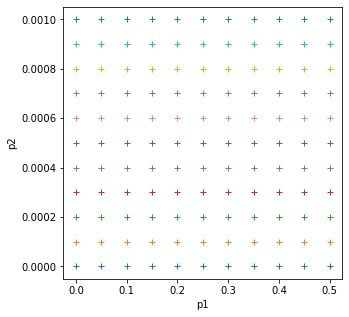

In [21]:
import matplotlib.pyplot as plt
# define the min and max and step for the grid we want
p0min,p0max,p0step = 0.0,0.5,0.05
p1min,p1max,p1step = 0.0,0.001,0.0001


gridp0,gridp1 = np.mgrid[p0min:p0max+p0step:p0step,\
                         p1min:p1max+p1step:p1step]

# plot it
fig, axs = plt.subplots(1,1,figsize=(5,5))
axs.plot(gridp0,gridp1,'+')
axs.set_xlabel('p1')
axs.set_ylabel('p2')

print(f'2d parameter grid: {gridp0.shape}')

## Summary statistics

Below are some representative arithmetic operations that you can use on arrays. Remember that they happen **elementwise** (i.e. to the whole array):

In [22]:
import numpy as np

# initialise some numbers
b = np.arange(4)
print(f'{b}^2 = {b**2}\n')

b = np.arange(4)
print(f'e^{b} = {np.exp(b)}\n')

a = np.array([20, 30, 40, 50])
print(f"assuming in radians,\n10*sin({a}) = {10 * np.sin(a)}")

print("\nSome useful numpy array methods for summary statistics...\n")
print(f"Find the maximum of an array: a.max():   {a.max()}")
print(f"Find the minimum of an array: a.min():   {a.min()}")
print(f"Find the sum of an array: a.sum():       {a.sum()}")
print(f"Find the mean of an array: a.mean():     {a.mean(): >5.2f}")
print(f"Find the std dev of an array: a.std():   {a.std() : >5.2f}")

[0 1 2 3]^2 = [0 1 4 9]

e^[0 1 2 3] = [ 1.          2.71828183  7.3890561  20.08553692]

assuming in radians,
10*sin([20 30 40 50]) = [ 9.12945251 -9.88031624  7.4511316  -2.62374854]

Some useful numpy array methods for summary statistics...

Find the maximum of an array: a.max():   50
Find the minimum of an array: a.min():   20
Find the sum of an array: a.sum():       140
Find the mean of an array: a.mean():     35.00
Find the std dev of an array: a.std():   11.18


In [23]:
# variance and standard deviation:
#
# try var and see if it is the same as std * std
var = a.var()
std = a.std()

# use np.sqrt for square root
print(f'sqrt({np.sqrt(var)}) should equal {std}')

sqrt(11.180339887498949) should equal 11.180339887498949


### Summary

In this section, you have been introduced to the `numpy` package and some detail on arrays. The big advantages of `numpy` are that you can easily perform array operators (such as adding two arrays together), and that `numpy` has a large number of useful functions for manipulating N-dimensional data in array form. This makes it particularly appropriate for raster geospatial data processing.

We have seen how to create various forms of array (e.g. `np.ones()`, `np.arange()`), how to calculate some basic statistics (`min()`, `max()` etc). and come across a range of `numpy` functions and concepts. 

Remember:


            import numpy as np
            
 | Function | description   | keywords | 
 |---|---|---|
 |`np.array(x)` | convert `x` (e.g. list) to `numpy` array | `dtype=` : specify data type, e.g. `np.float`, `np.bool`, `np.int` |
 |`np.ones(s)` | generate array of values `1` of shape `s` |  `dtype=` 
  |`np.zeros(s)` | generate array of values `0` of shape `s` |  `dtype=` 
  |`np.linspace(start,stop,nsamp)` | generate array of `nsamp` values from `start` to `stop` |  `dtype=` |
| `np.arange(start,stop,step)` | generate array of numbers from `start` to (but not including) `stop` in steps of `step` | `dtype=` |
| `p0,p1 = np.mgrid[p0min:p0max:p0step,p1min:p1max:p1step]` | generate grids `p0`, `p1` of combinations of samples from `p0min` to (but not including) `p0max` in steps of `p0step` and `p1min` to (but not including) `p1max` in steps of `p1step`|
  | `a.astype(dtype)` | convert array `a` to data type `dtype` ||
  | a * b | multiply array `a` element-wise by array `b` , etc. for arithmetic|
 | `a.shape` | tuple giving shape of array `a` | 
 | `a.ndim` | tuple giving number of dimensions  of array `a` | 
 | `a.size` | tuple giving total number of elements in array `a` | 
 | `a[start:stop:step]` | array indexing for slice from `start` to `stop` in steps of `step` e.g. `np.array([2,5,3])[2:3])`|
 | `a[index]` | array indexing by explicit index tuple or tuple list e.g. `np.array([2,5,3])[(1,)]` |
 | `a.min()` | minimum value in array `a` | `axis=N` : value taken over axis `N` |
 | `a.max()` | maximum value in array `a` | `axis=N` : value taken over axis `N` |
 | `a.mean()` | mean value in array `a` | `axis=N` : value taken over axis `N` |
 | `a.std()` | standard deviation of values in array `a` | `axis=N` : value taken over axis `N` |
 | `a.var()` | variance of values in array `a` | `axis=N` : value taken over axis `N` |
 | `a.sum()` | sum of values in array `a` | `axis=N` : value taken over axis `N` |
 | `a.prod()` | product of values in array `a` | `axis=N` : value taken over axis `N` |
 |`np.median(a)` | median of values in array `a`, assumed `a` values in radians |`axis=N` : value taken over axis `N` |
 |`np.sqrt(a)` | square root of values in array `a` ||
  |`np.sin(a)` | sine of values in array `a`, assumed `a` values in radians etc.|
      |`np.exp(a)` | exponential of values in array `a`|